3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Untitled folder/bank.csv")
print(df.info())

obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)
print({col: df[col].unique() for col in obj_cols})
print(df.isnull().sum())

df_num = df.select_dtypes(exclude='object')
df_num.to_csv("banknumericdata.csv", index=False)

df2 = pd.read_csv("banknumericdata.csv")
print(df2.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month',

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Untitled folder/medical_students_dataset.csv")

print(df.info())
print(df.isnull().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col + "_mean"] = df[col].fillna(df[col].mean())
        df[col + "_median"] = df[col].fillna(df[col].median())

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode = df[col].mode().iloc[0]
        df[col + "_mode"] = df[col].fillna(mode)
        df[col + "_unknown"] = df[col].fillna("Unknown")

print(df.duplicated().sum())

df_no_dup = df.drop_duplicates()
print(df_no_dup.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        200

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Untitled folder/Titanic-Dataset.csv')

subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df = subset_df[subset_df['Pclass'] == 1]

fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print(fare_mean, fare_median, fare_max, fare_min)


84.1546875 60.287499999999994 512.3292 0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Untitled folder/Titanic-Dataset.csv")

df_subset = df[['Name','Pclass','Sex','Age','Fare','Survived']]
df_first = df_subset[df_subset['Pclass'] == 1]

null_age_count = df_first['Age'].isnull().sum()
print("Null Age Values:", null_age_count)

df_first = df_first.dropna(subset=['Age'])
print(df_first.shape)


Null Age Values: 30
(186, 6)


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Untitled folder/Titanic-Dataset.csv")

encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, encoded], axis=1)

df = df.drop('Embarked', axis=1)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


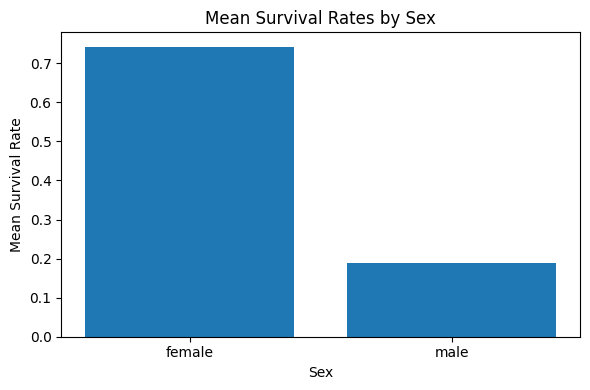

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Untitled folder/Titanic-Dataset.csv")

mean_rates = df.groupby("Sex")["Survived"].mean()
print(mean_rates)

plt.figure(figsize=(6, 4))
plt.bar(mean_rates.index, mean_rates.values)
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Mean Survival Rates by Sex")
plt.tight_layout()
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

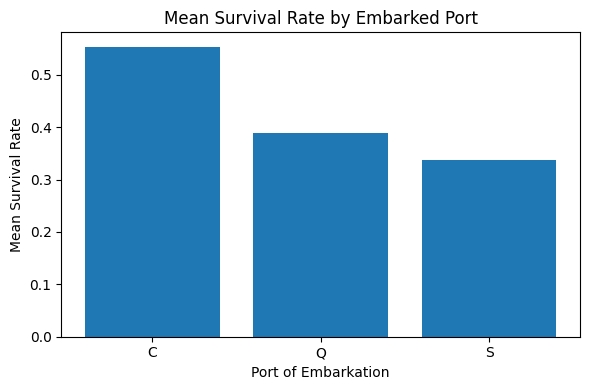

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Untitled folder/Titanic-Dataset.csv")

grouped = df.groupby("Embarked")["Survived"].mean()

plt.figure(figsize=(6,4))
plt.bar(grouped.index, grouped.values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.title("Mean Survival Rate by Embarked Port")
plt.tight_layout()
plt.show()
